#Logistic Regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dataset=pd.read_csv("medical_data.csv")

In [5]:
dataset.head(3)

,age,gender,symptoms,test_result,disease_present
0,58,Female,Moderate,Negative,0
1,71,Female,Severe,Positive,0
2,48,Male,Mild,Positive,0


In [6]:
dataset.drop(columns=["gender","symptoms","test_result"],inplace=True)

In [7]:
dataset.head(40)

,age,disease_present
0,58,0
1,71,0
2,48,0
3,34,0
4,62,0
5,27,0
6,40,0
7,58,0
8,77,0
9,38,0


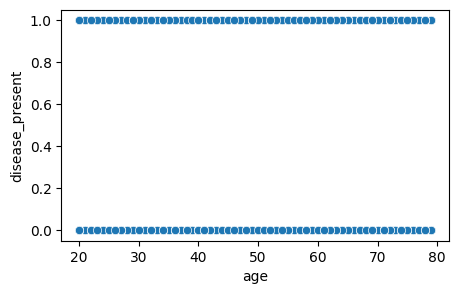

In [8]:
plt.figure(figsize=(5,3))
sns.scatterplot(x=dataset["age"],y=dataset["disease_present"])
plt.show()                                                   

In [9]:
x=dataset[["age"]]
y=dataset["disease_present"]
x.dtypes

age    int64
dtype: object

In [10]:
from imblearn.under_sampling import RandomUnderSampler

In [11]:
ro=RandomUnderSampler()

In [12]:
ro_x,ro_y=ro.fit_resample(x,y)
ro_y.value_counts()

disease_present
0    19853
1    19853
Name: count, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(ro_x,ro_y,test_size=0.2,random_state=42)

In [15]:
from sklearn.linear_model import LogisticRegression

In [16]:
lr=LogisticRegression()

In [17]:
lr.fit(x_train,y_train)

LogisticRegression()

In [22]:
lr.predict([[47]])

c:\Users\HP\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [21]:
lr.score(x_test,y_test)*100

50.12591286829514

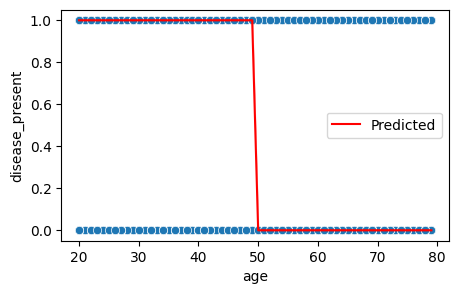

In [20]:
plt.figure(figsize=(5,3))
sns.scatterplot(x="age",y="disease_present",data=dataset)
sns.lineplot(x="age", y=lr.predict(x),data=dataset, label="Predicted", color='red')
plt.show()  